### Import các thư viện cần thiết

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Đọc vector

File glove.6B.50d.txt chứa các từ và vector tương ứng được huấn luyện bằng mô hình GloVe

In [2]:
words = []
vectors = []

with open('datasets/glove.6B.50d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split()
        words.append(parts[0])
        vectors.append([float(x) for x in parts[1:]])

words = np.array(words)
vectors = np.array(vectors, dtype=np.float32)

In [8]:
print('Tổng số từ:', len(words))
print('Số chiều của các vector:', len(vectors[0]))

Tổng số từ: 400000
Số chiều của các vector: 50


### Giảm chiều

Giảm chiều các vector từ 50 chiều xuống 2 chiều sử dụng PCA

In [3]:
pca = PCA(n_components=2)
vectors_reduced = pca.fit_transform(vectors)

### Trực quan hóa

Hàm plot_words() thực hiện vẽ các vector từ bộ dữ liệu trong đó các từ truyền vào sẽ được làm nổi bật

In [4]:
def plot_words(target_words):
    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_reduced[:, 0], vectors_reduced[:, 1], s=1, alpha=0.1, color='gray')

    for word in target_words:
        idx = np.where(words == word)[0]
        if len(idx) == 0:
            print(f"[!] Không tìm thấy từ '{word}' trong tập embeddings.")
            continue

        x, y = vectors_reduced[idx[0]]
        plt.scatter(x, y, color='red', s=40)
        plt.text(x + 0.02, y + 0.02, word, fontsize=10, color='red')

    plt.title(f"Highlight các từ: {', '.join(target_words)}")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

Phân tích kết quả trực quan hóa một vài cụm từ

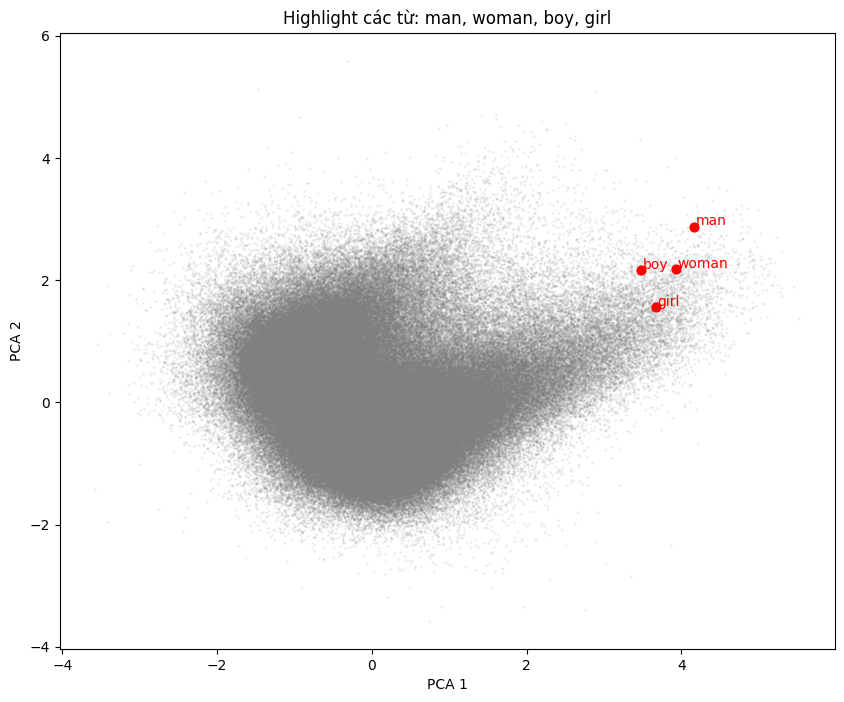

In [14]:
plot_words(['man', 'woman', 'boy', 'girl'])

-> Các từ chỉ giới tính có xu hướng gần nhau nhưng độ tương quan giữa các từ chưa rõ rệt (ví dụ boy-man so với girl-woman)

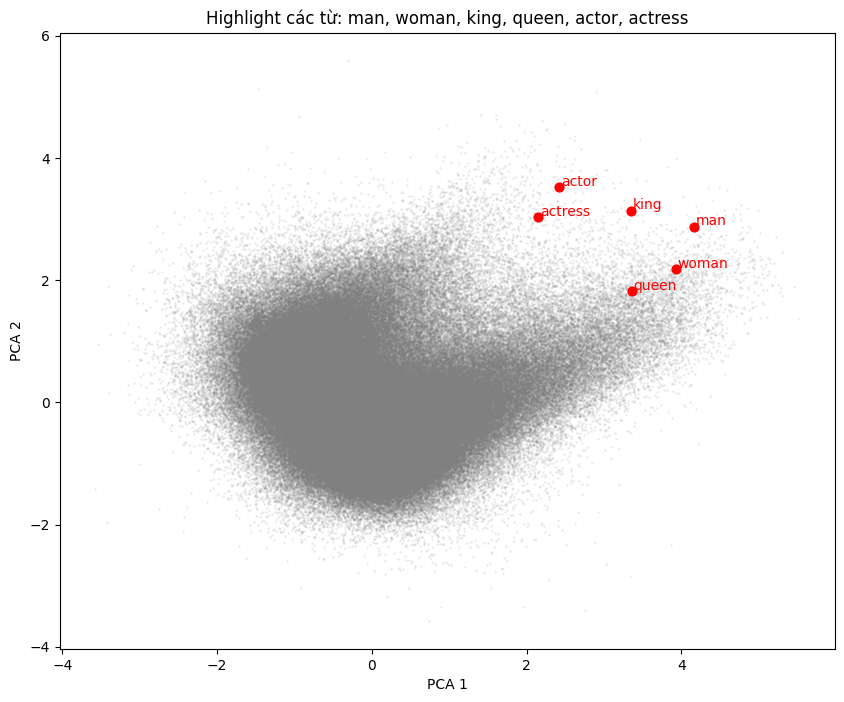

In [15]:
plot_words(['man', 'woman', 'king', 'queen', 'actor', 'actress'])

-> Các cặp từ chỉ giới tính có mối quan hệ nhất định

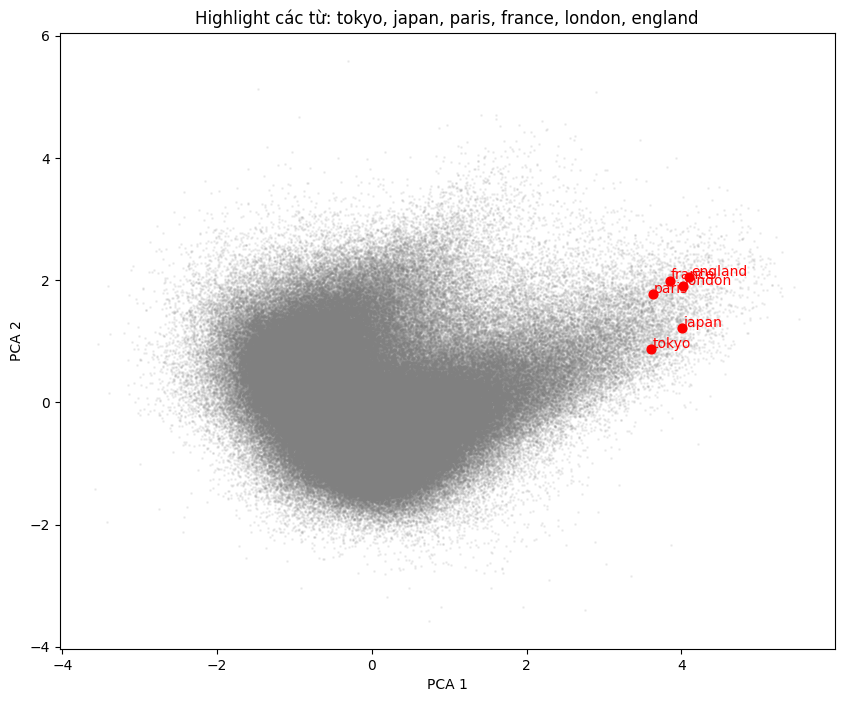

In [18]:
plot_words(['tokyo', 'japan', 'paris', 'france', 'london', 'england'])

-> Các từ chỉ thành phố thì ở gần từ chỉ quốc gia tương ứng, các quốc gia châu Âu (Anh, Pháp) ở gần nhau hơn so với Nhật Bản

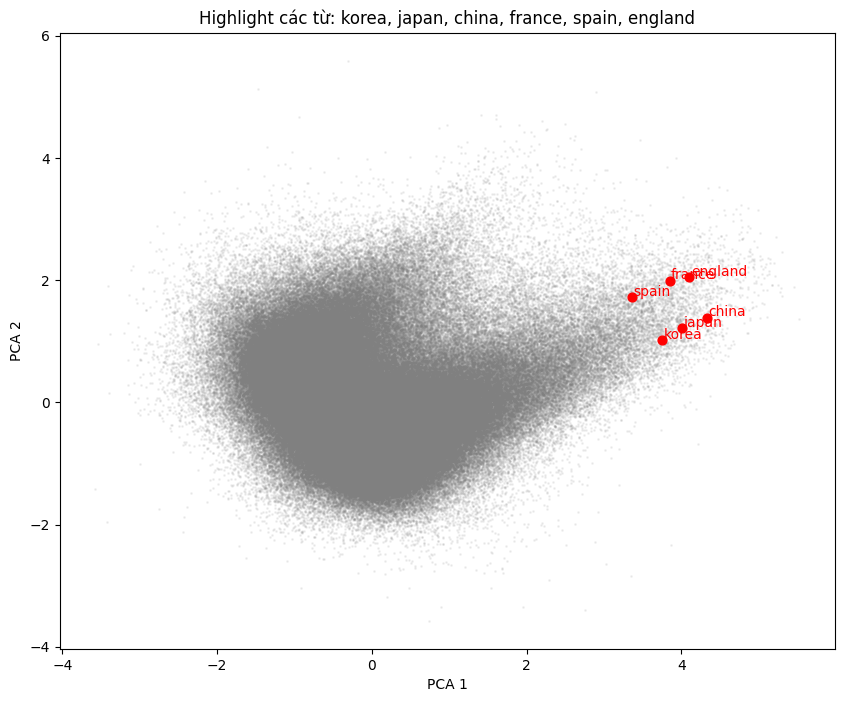

In [23]:
plot_words(['korea', 'japan', 'china', 'france', 'spain', 'england'])

-> Các quốc gia châu Á tạo thành một cụm, tương tự với châu Âu

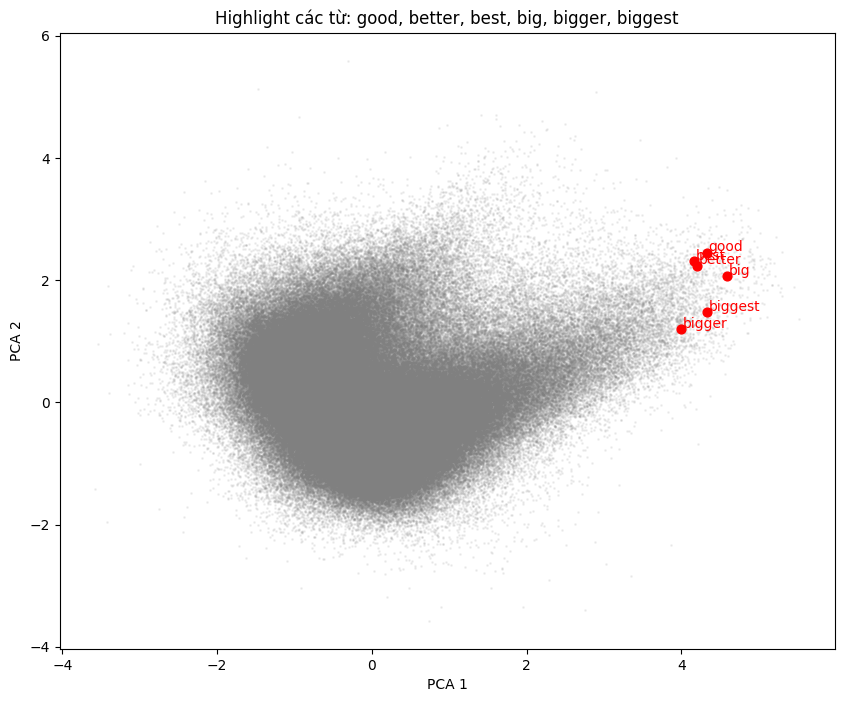

In [33]:
plot_words(['good', 'better', 'best', 'big', 'bigger', 'biggest'])

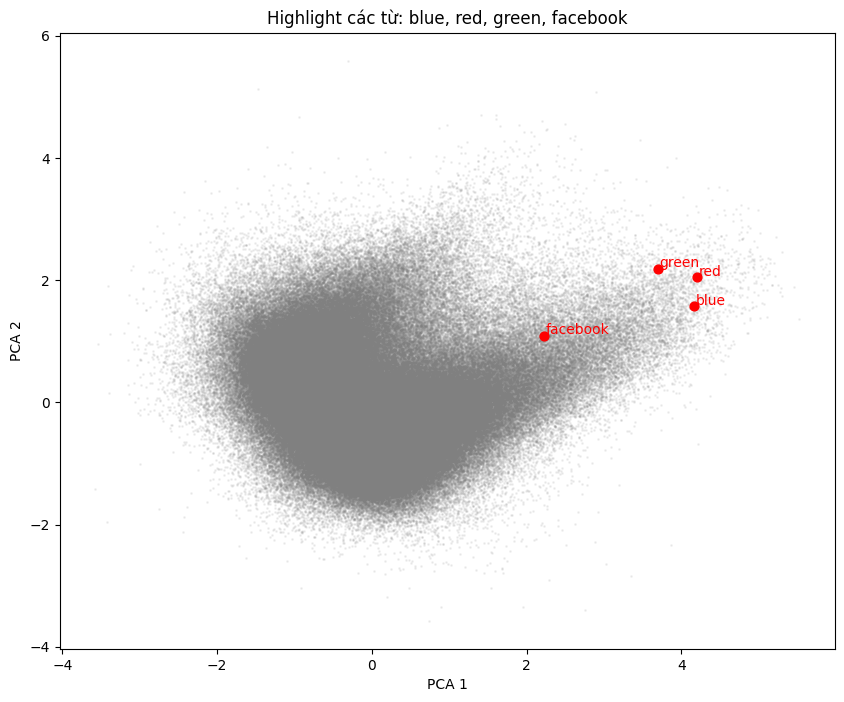

In [41]:
plot_words(['blue', 'red', 'green', 'facebook'])

-> Từ facebook không liên quan với các từ còn lại nên có vị trí tách biệt hẳn

-> Các vector có thể nắm bắt được các dạng khác nhau của từ

Nhận xét chung:
- Vector thể hiện được tương đối quan hệ ngữ nghĩa giữa các từ
- Việc giảm chiều từ 50 xuống 2 chiều làm mất đi phần nhiều thông tin của các vector nên việc thể hiện chỉ mang tính tương đối
- Các từ phổ biến (xuất hiện nhiều) thì sẽ được thể hiện ngữ nghĩa tốt hơn (do có nhiều dữ liệu huấn luyện hơn)